### Contours

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

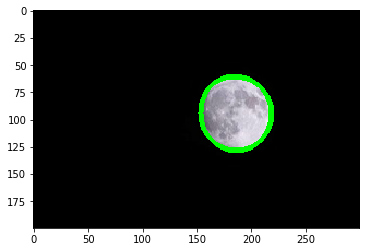

In [47]:
img = cv2.imread('../Data/moon.jpg')
img2 = np.copy(img)
imgray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)


#threshold를 이용하여 binary image로 변환
ret, thresh = cv2.threshold(imgray, 50, 255, 0) # 여기서 threshold 메소드의 임계값 기준을 잘 정해야 한다.

image, contours, hierachy = cv2.findContours(thresh, cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
image = cv2.drawContours(img2, contours, -1, (0,255,0), 3)

plt.imshow(image)
plt.show()

여러 장의 사진이 있다면 명암이 제각기 다르므로 `cv2.adaptiveThreshold()`를 사용해야 할 것이다.

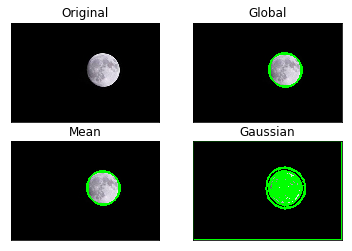

In [56]:
th2 = cv2.adaptiveThreshold(imgray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 15, 2)
th3 = cv2.adaptiveThreshold(imgray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,15, 2)
th = [0, 0, th2, th3]
titles = ['Original','Global','Mean','Gaussian']
images = [img, image, image2, image3]

for i in range(4):
    img2 = np.copy(img)
    if i in [2, 3]:
        image, contours, hierachy = cv2.findContours(th[i], cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
        image = cv2.drawContours(img2, contours, -1, (0,255,0), 3)
    plt.subplot(2,2,i+1), plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])    
plt.show()

In [4]:
print(image)
print("\n\n\n")
print(contours)
print("\n\n\n")
print(hierachy)

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]




[array([[[177,  61]],

       [[176,  62]],

       [[174,  62]],

       [[173,  63]],

       [[172,  63]],

       [[171,  64]],

       [[170,  64]],

       [[169,  65]],

       [[168,  65]],

       [[167,  66]],

       [[166,  66]],

       [[159,  73]],

       [[159,  74]],

       [[158,  75]],

       [[158,  76]],

       [[157,  77]],

       [[157,  79]],

       [[156,  80]],

       [[156,  81]],

       [[155,  82]],

       [[155,  84]],

       [[154,  85]],

       [[154,  93]],

       [[153,  94]],

       [[154,  95]],

       [[154, 102]],

       [[

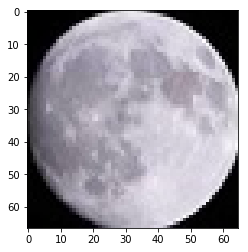

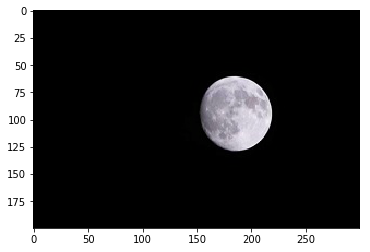

In [49]:
def crop_image_with_contours(image, contours):
    x_max, y_max, x_min, y_min = contours[0][0][0][0], contours[0][0][0][1], contours[0][0][0][0], contours[0][0][0][1]
    
    for i in range(len(contours[0])):
        x_i = contours[0][i][0][0]
        y_i = contours[0][i][0][1]
        if x_i > x_max: x_max = x_i
        if x_i < x_min: x_min = x_i
        if y_i > y_max: y_max = y_i
        if y_i < y_min: y_min = y_i
    
    plt.imshow(image[y_min:y_max, x_min:x_max])
    plt.show()
    
    return image

crop_image_with_contours(img, contours)

# 원본 이미지에 영향없는 crop 함수
plt.imshow(img)
plt.show()